# Fake news detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Dataset 1: Onion Not Onion

In [2]:
data = pd.read_csv("/content/drive/MyDrive/OnionOrNot.csv")

In [3]:
data

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1
...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1
23996,Connecticut TV station under fire after using ...,0
23997,Jurisprudence Fetishist Gets Off On Technicality,1
23998,Employees From Other Department Announce Plan ...,1


In [4]:
#data.label=data.label.map({1:'Fake',0:'Real'})
#data

In [5]:
data.columns=['text','target']
data

,text,target
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1
...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1
23996,Connecticut TV station under fire after using ...,0
23997,Jurisprudence Fetishist Gets Off On Technicality,1
23998,Employees From Other Department Announce Plan ...,1


In [6]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()


,text,target
0,entire facebook staff laughs as man tightens p...,1
1,muslim woman denied soda can for fear she coul...,0
2,bold move: hulu has announced that they’re gon...,1
3,despondent jeff bezos realizes he’ll have to w...,1
4,"for men looking for great single women, online...",1


In [7]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data

,text,target
0,entire facebook staff laughs as man tightens p...,1
1,muslim woman denied soda can for fear she coul...,0
2,bold move hulu has announced that they’re gonn...,1
3,despondent jeff bezos realizes he’ll have to w...,1
4,for men looking for great single women online ...,1
...,...,...
23995,teen pregnancy rate prompting more high school...,1
23996,connecticut tv station under fire after using ...,0
23997,jurisprudence fetishist gets off on technicality,1
23998,employees from other department announce plan ...,1


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
data.head()

,text,target
0,entire facebook staff laughs man tightens priv...,1
1,muslim woman denied soda fear could use weapon,0
2,bold move hulu announced they’re gonna go ahea...,1
3,despondent jeff bezos realizes he’ll work 9 se...,1
4,men looking great single women online dating o...,1


target
0    15000
1     9000
Name: text, dtype: int64


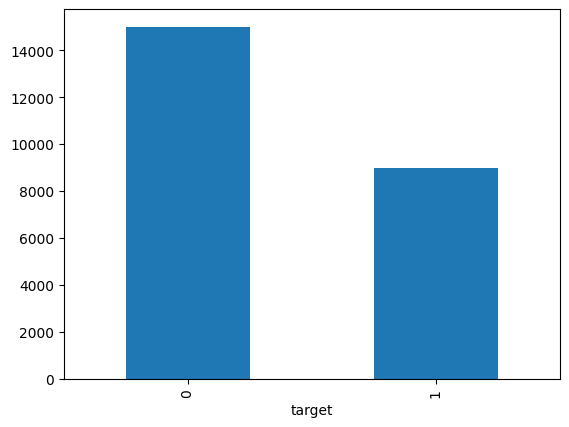

In [10]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

0        entire facebook staff laughs man tightens priv...
2        bold move hulu announced they’re gonna go ahea...
3        despondent jeff bezos realizes he’ll work 9 se...
4        men looking great single women online dating o...
5        kim jongun wonders nuclear threats distracting...
                               ...                        
23992    frenzied trump supporters admit they’d happy t...
23994    ruby tuesday waiter warns jill stein green par...
23995    teen pregnancy rate prompting high schools eli...
23997            jurisprudence fetishist gets technicality
23998    employees department announce plan ramble fuck...
Name: text, Length: 9000, dtype: object


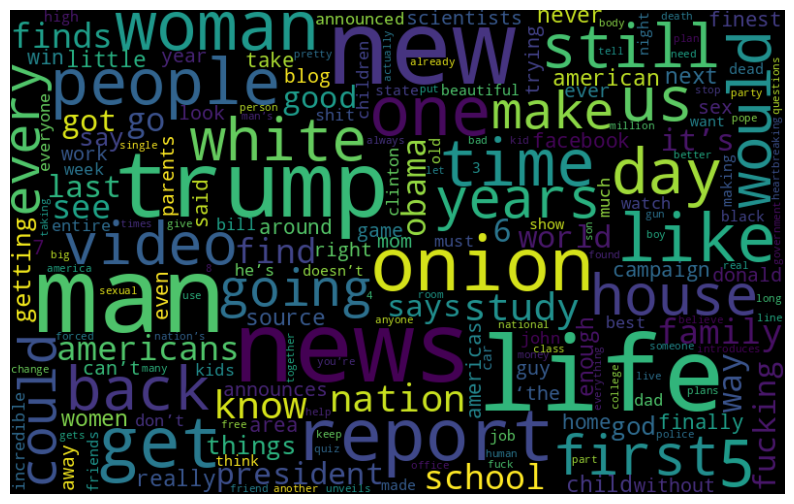

In [11]:
# Word cloud for fake news
from wordcloud import WordCloud
from collections import Counter

fake_data = data[data["target"] == 1]
print(fake_data.text)
all_words = ' '.join([text for text in fake_data.text])

words = Counter(all_words.split())
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate_from_frequencies(words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

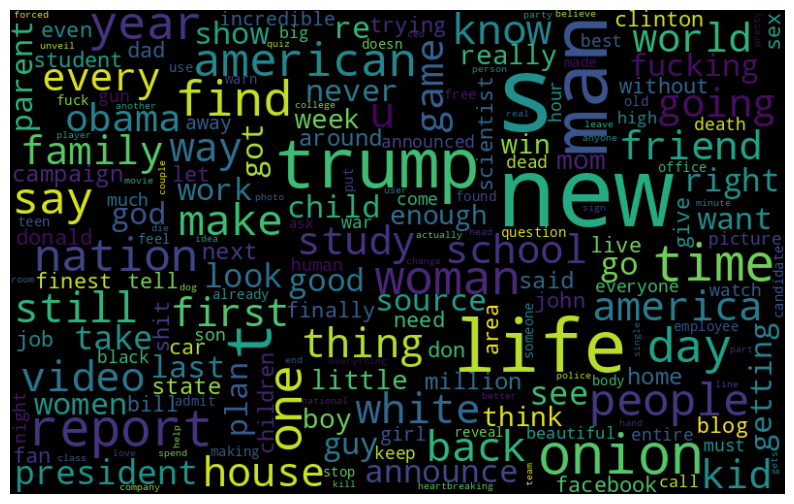

In [12]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

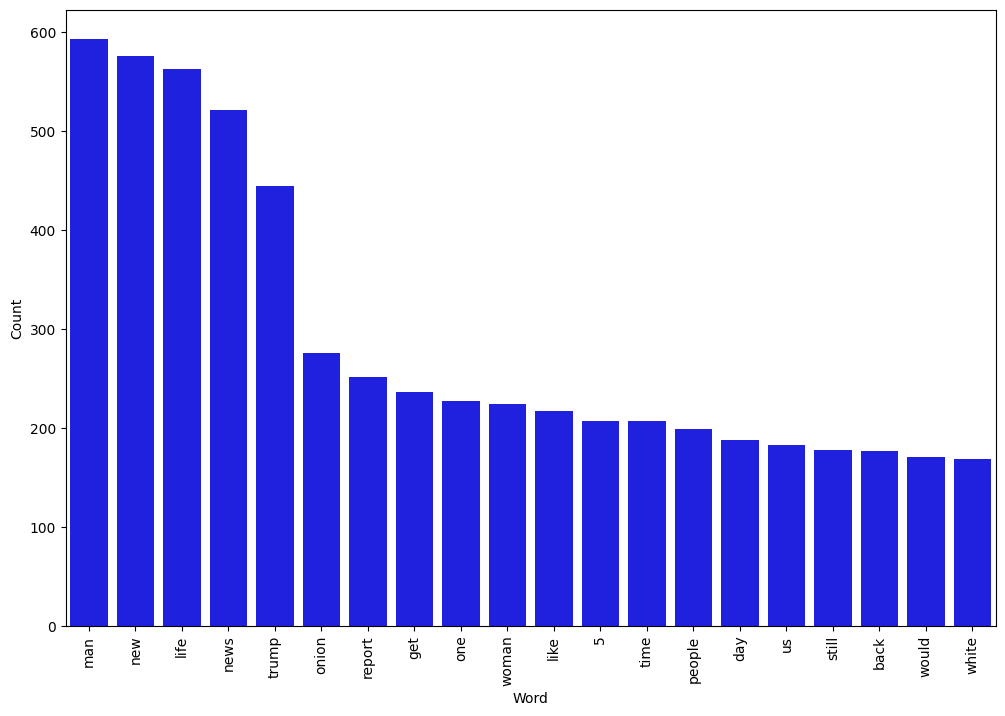

In [14]:
counter(data[data["target"] == 1], "text", 20)

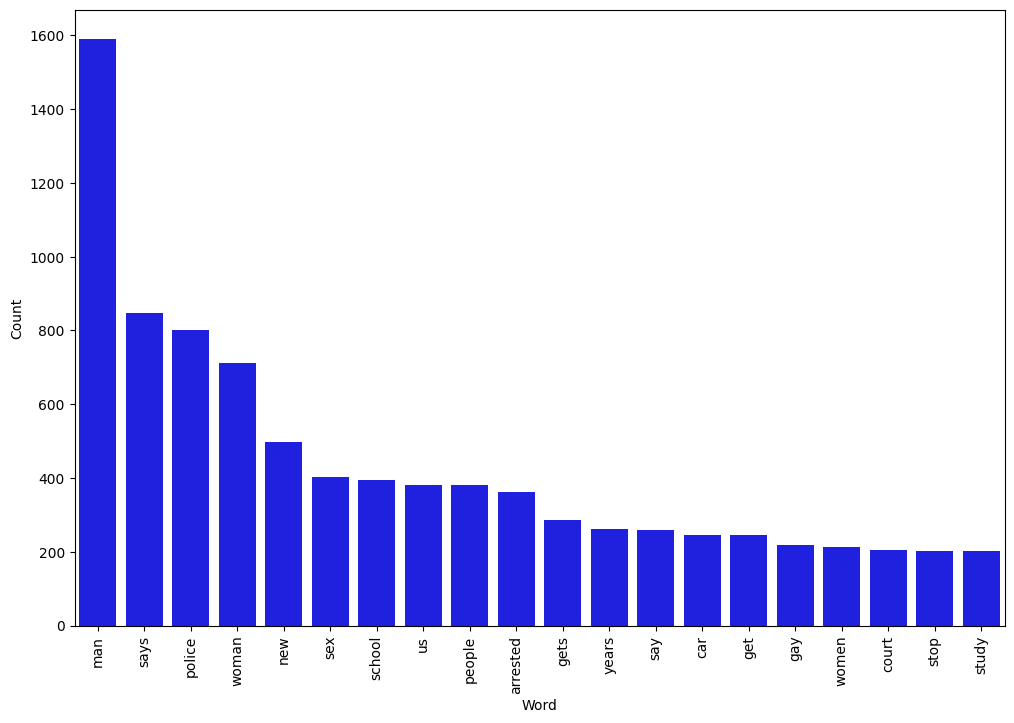

In [15]:
# Most frequent words in real news
counter(data[data["target"] == 0], "text", 20)

In [16]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

Naive Bayes

In [21]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 81.42%


In [22]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.79      0.96      0.87      3018
        Real       0.90      0.56      0.69      1782

    accuracy                           0.81      4800
   macro avg       0.85      0.76      0.78      4800
weighted avg       0.83      0.81      0.80      4800



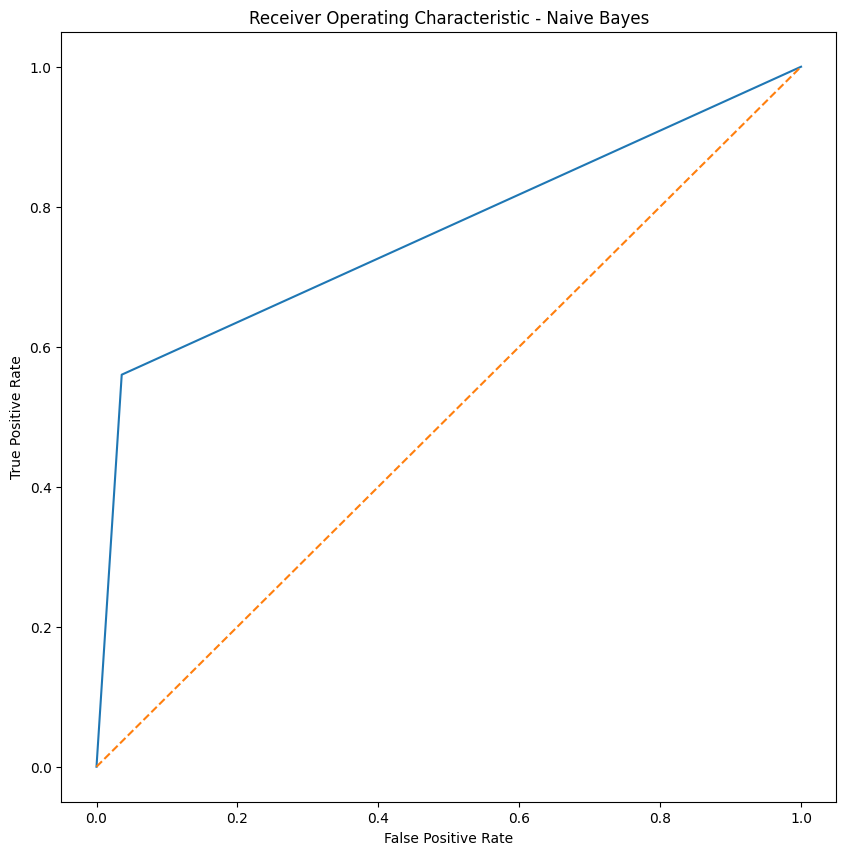

In [23]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_nb=fpr
tpr_nb=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


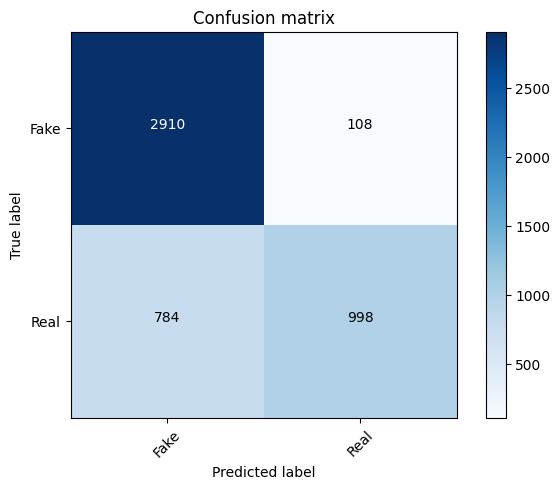

In [24]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy",random_state=65))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 81.12%


In [26]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.83      0.88      0.85      3018
        Real       0.77      0.70      0.73      1782

    accuracy                           0.81      4800
   macro avg       0.80      0.79      0.79      4800
weighted avg       0.81      0.81      0.81      4800



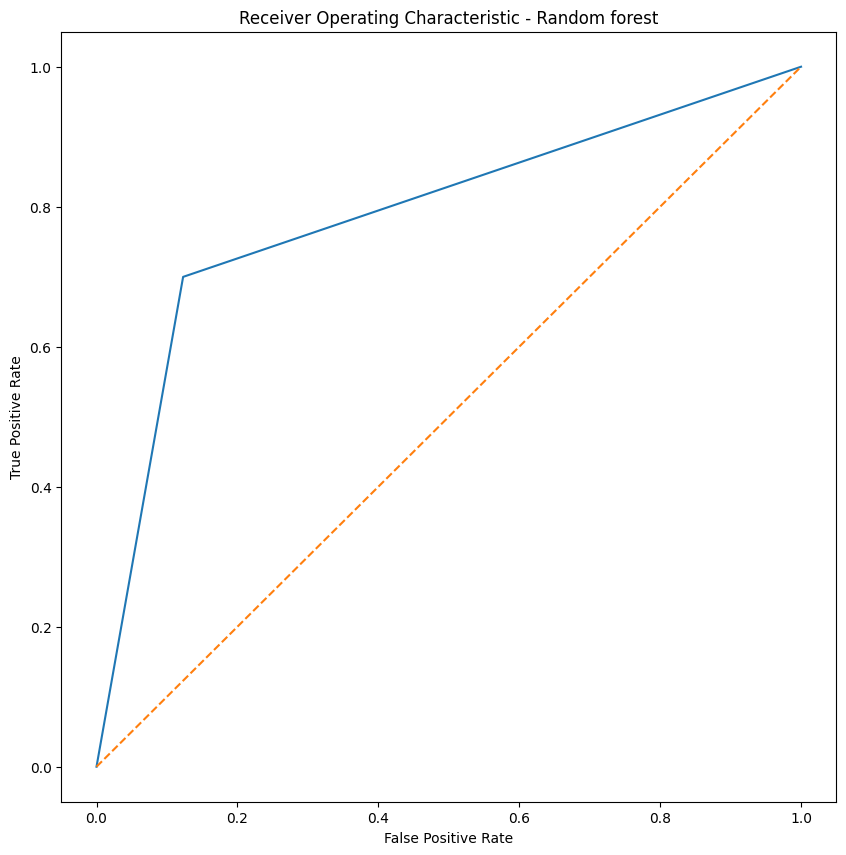

In [27]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random forest')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_rf=fpr
tpr_rf=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


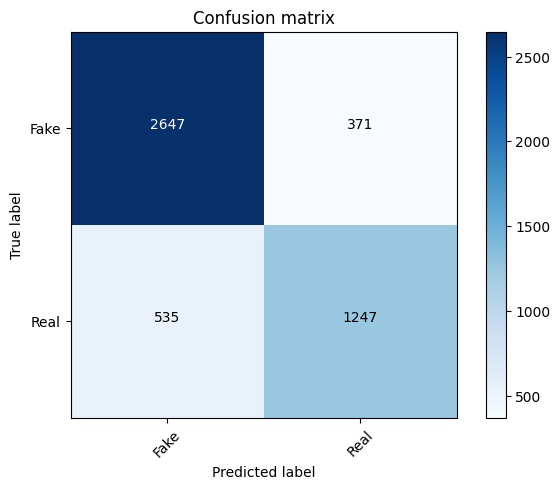

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

svm

In [29]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',random_state=65) # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 84.67%


In [30]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.86      0.91      0.88      3018
        Real       0.82      0.75      0.78      1782

    accuracy                           0.85      4800
   macro avg       0.84      0.83      0.83      4800
weighted avg       0.85      0.85      0.84      4800



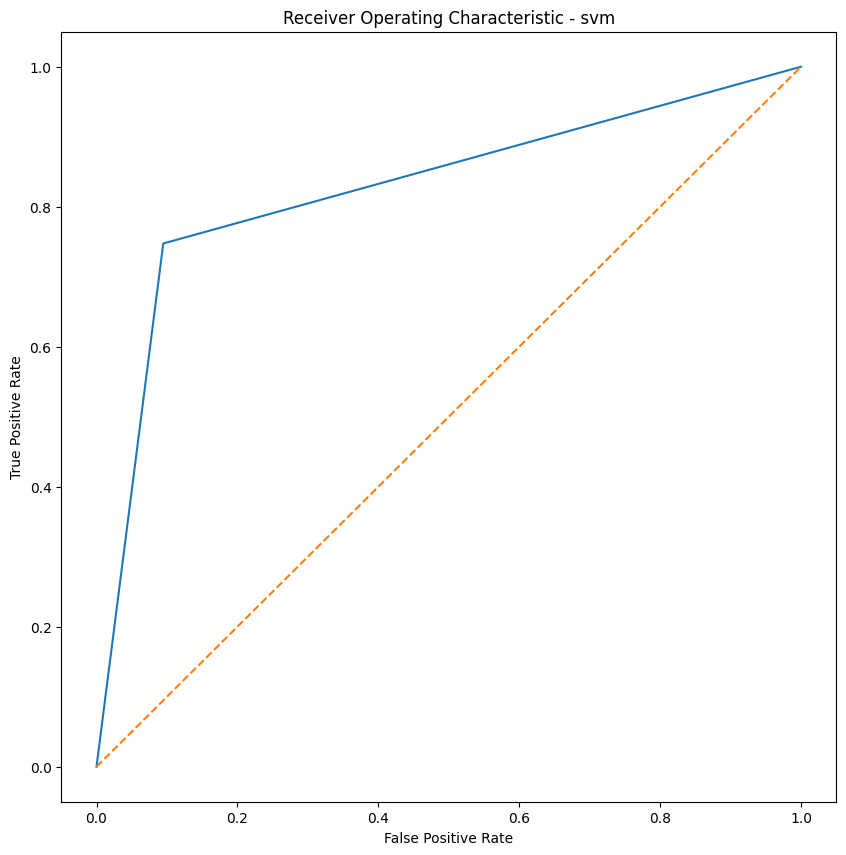

In [31]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_svm=fpr
tpr_svm=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


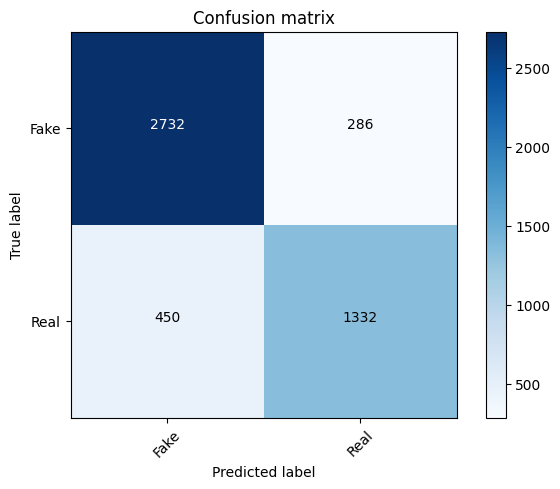

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', GradientBoostingClassifier(learning_rate=0.1,
                                              n_estimators=400,
                                             random_state=65))
    ])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Gradient Boost'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 77.19%


In [36]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.75      0.95      0.84      3018
        Real       0.85      0.47      0.60      1782

    accuracy                           0.77      4800
   macro avg       0.80      0.71      0.72      4800
weighted avg       0.79      0.77      0.75      4800



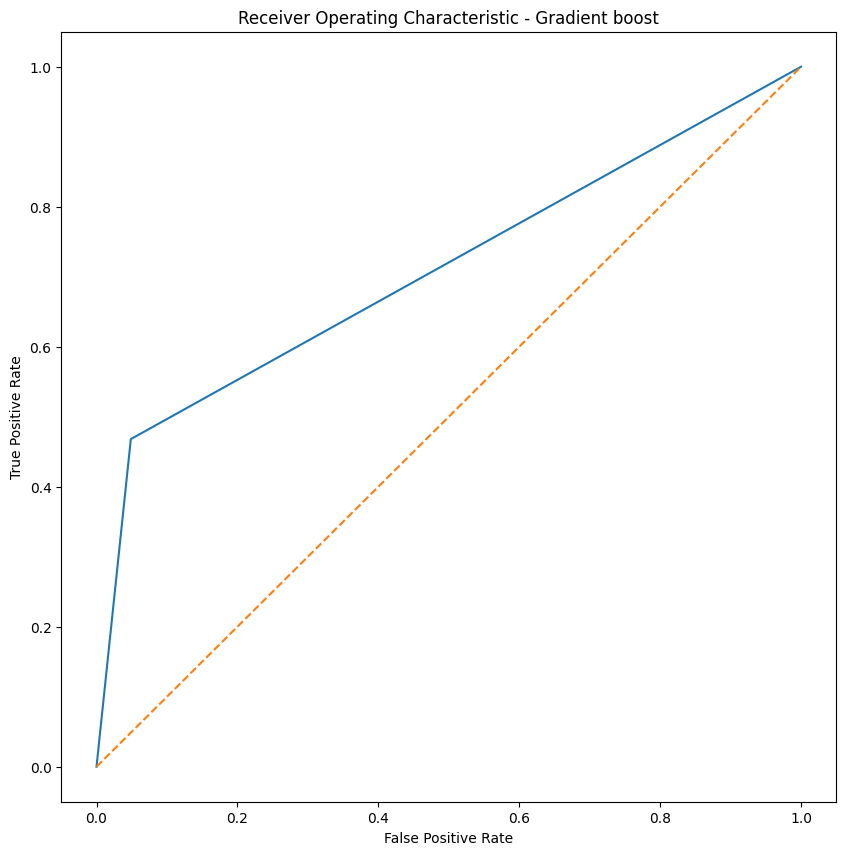

In [37]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient boost')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_gb=fpr
tpr_gb=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


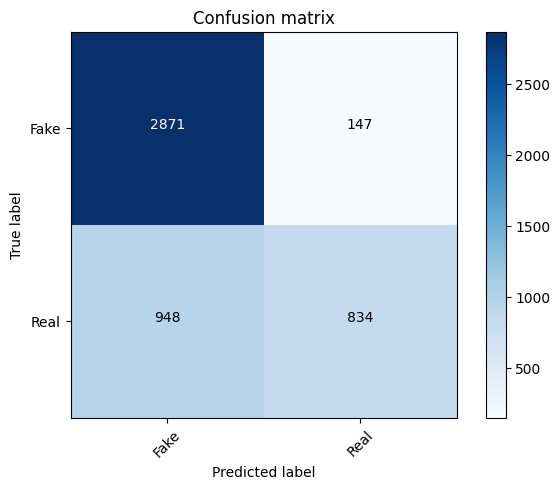

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

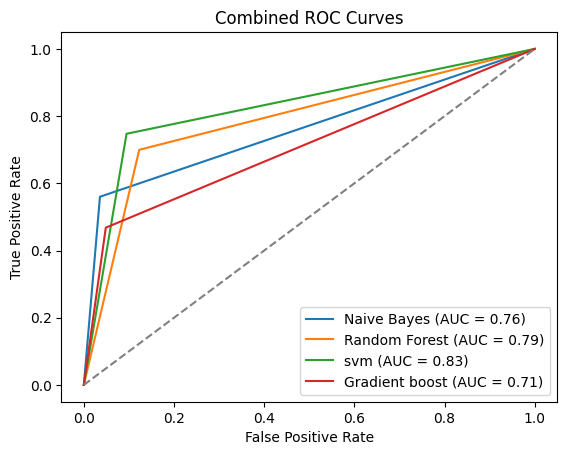

In [39]:
from sklearn.metrics import roc_auc_score
roc_curves = [
    ('Naive Bayes', (fpr_nb, tpr_nb)),
    ('Random Forest', (fpr_rf, tpr_rf)),
    ('svm', (fpr_svm, tpr_svm)),
    ('Gradient boost', (fpr_gb, tpr_gb))
]
def calculate_auc(tpr, fpr):
    # Sort the FPR and TPR in ascending order of FPR
    sorted_indices = sorted(range(len(fpr)), key=lambda k: fpr[k])
    sorted_fpr = [fpr[i] for i in sorted_indices]
    sorted_tpr = [tpr[i] for i in sorted_indices]

    # Calculate AUC using the trapezoidal rule
    auc = 0.0
    for i in range(1, len(sorted_fpr)):
        auc += 0.5 * (sorted_tpr[i] + sorted_tpr[i - 1]) * (sorted_fpr[i] - sorted_fpr[i - 1])

    return auc

for model_name, (fpr, tpr) in roc_curves:
  # Replace y_true and y_scores with your actual data
    auc = calculate_auc(tpr, fpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plotting the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves')
plt.legend()
plt.show()


([<matplotlib.axis.YTick at 0x7fab13774400>,
 [Text(0, 65, '65'),
  Text(0, 70, '70'),
  Text(0, 75, '75'),
  Text(0, 80, '80'),
  Text(0, 85, '85'),
  Text(0, 90, '90'),
  Text(0, 95, '95'),
  Text(0, 100, '100')])

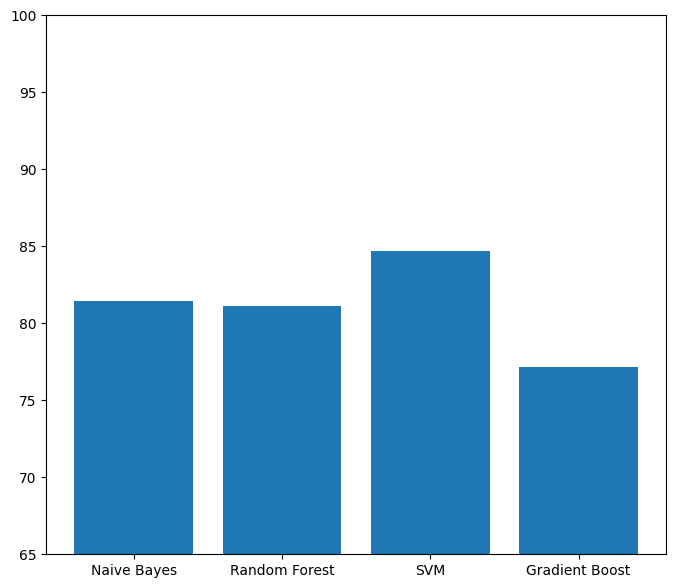

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((65,70, 75,80, 85,90, 95, 100))